Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import scipy
import math
from matplotlib import pyplot as plt
print ("Imported all libraries successfully...")

Imported all libraries successfully...


In [ ]:
## neera

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

ATL_raw = pd.read_csv("ATL_delay.csv")
DEN_raw = pd.read_csv("DEN_delay.csv")
DFW_raw = pd.read_csv("DFW_delay.csv")
LAX_raw = pd.read_csv("LAX_delay.csv")
ORD_raw = pd.read_csv("ORD_delay.csv")


In [ ]:
## maanya

column_names = ORD_raw.columns
print(column_names)

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


**Examining the raw data**

This block prints a quick overview of each airport’s raw dataset, including the number of rows and columns, sample values, and the data types of each feature. It helps verify that the files loaded correctly and lets us compare the structure of ATL, DEN, DFW, LAX, and ORD before cleaning or combining them. This step ensures we understand the data we are working with and confirms consistency across all five airports.

In [ ]:
## maanya

for name, df in {
    'ATL': ATL_raw,
    'DEN': DEN_raw,
    'DFW': DFW_raw,
    'LAX': LAX_raw,
    'ORD': ORD_raw
}.items():
    print(f"\n{name} — Basic Info:")
    print(df.shape)
    print(df.columns.tolist()[:10], '...')
    display(df.head(3))
    display(df.info())
    display(df.describe())



ATL — Basic Info:
(169, 21)
['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct'] ...


year  month carrier           carrier_name airport  \
0  2024     12      NK        Spirit Airlines     ATL   
1  2024     12      OH      PSA Airlines Inc.     ATL   
2  2024     12      OO  SkyWest Airlines Inc.     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        858.0      273.0   
1  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        299.0       94.0   
2  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        599.0      189.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0       55.18        2.46  ...         3.37             55.09            6.0   
1       25.85        3.40  ...         0.69             27.01            2.0   
2      123.70       37.76  ...         0.00              1.57            5.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           1.0    17094.0         3404.0          249.0     8590.0   
1           1.0     6475.0         1764.0          472.0     1568.0   
2           2.0    23235.0        16633.0         4186.0     2309.0   

   security_delay  late_aircraft_delay  
0           173.0               4678.0  
1            11.0               2660.0  
2             0.0                107.0  

[3 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 169 non-null    int64  
 1   month                169 non-null    int64  
 2   carrier              169 non-null    object 
 3   carrier_name         169 non-null    object 
 4   airport              169 non-null    object 
 5   airport_name         169 non-null    object 
 6   arr_flights          169 non-null    float64
 7   arr_del15            169 non-null    float64
 8   carrier_ct           169 non-null    float64
 9   weather_ct           169 non-null    float64
 10  nas_ct               169 non-null    float64
 11  security_ct          169 non-null    float64
 12  late_aircraft_ct     169 non-null    float64
 13  arr_cancelled        169 non-null    float64
 14  arr_diverted         169 non-null    float64
 15  arr_delay            169 non-null    flo

None

year       month   arr_flights    arr_del15   carrier_ct  weather_ct  \
count   169.0  169.000000    169.000000   169.000000   169.000000  169.000000   
mean   2024.0    6.532544   2026.852071   348.029586   109.189349   13.133550   
std       0.0    3.477882   4779.196529   751.578723   238.074826   29.969038   
min    2024.0    1.000000      1.000000     1.000000     0.000000    0.000000   
25%    2024.0    4.000000    144.000000    31.000000     9.150000    0.880000   
50%    2024.0    7.000000    587.000000   120.000000    48.680000    2.710000   
75%    2024.0   10.000000    995.000000   284.000000    81.960000    9.970000   
max    2024.0   12.000000  20679.000000  5544.000000  1886.580000  176.520000   

            nas_ct  security_ct  late_aircraft_ct  arr_cancelled  \
count   169.000000   169.000000        169.000000     169.000000   
mean     93.409586     0.810178        131.487160      21.201183   
std     193.662476     1.669939        302.275422     117.312544   
min       0.000000     0.000000          0.000000       0.000000   
25%       8.120000     0.000000          4.900000       1.000000   
50%      28.680000     0.000000         24.690000       4.000000   
75%      88.760000     0.780000        112.850000      15.000000   
max    1347.120000     9.640000       2148.280000    1508.000000   

       arr_diverted      arr_delay  carrier_delay  weather_delay  \
count    169.000000     169.000000     169.000000     169.000000   
mean       3.349112   26698.088757   10760.508876    1429.047337   
std       11.078831   67311.744984   31168.644477    3419.364580   
min        0.000000      44.000000       0.000000       0.000000   
25%        0.000000    1754.000000     513.000000      47.000000   
50%        0.000000    9049.000000    3246.000000     312.000000   
75%        2.000000   22412.000000    7034.000000    1065.000000   
max      113.000000  648300.000000  321792.000000   28839.000000   

          nas_delay  security_delay  late_aircraft_delay  
count    169.000000      169.000000           169.000000  
mean    4516.520710       36.485207          9955.526627  
std    10358.360496       79.558387         24241.133538  
min        0.000000        0.000000             0.000000  
25%      311.000000        0.000000           290.000000  
50%     1286.000000        0.000000          2184.000000  
75%     4255.000000       28.000000          8917.000000  
max    94682.000000      398.000000        218386.000000


DEN — Basic Info:
(126, 21)
['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct'] ...


year  month carrier              carrier_name airport  \
0  2024     12      OO     SkyWest Airlines Inc.     DEN   
1  2024     12      UA  United Air Lines Network     DEN   
2  2024     12      WN        Southwest Airlines     DEN   

                       airport_name  arr_flights  arr_del15  carrier_ct  \
0  Denver, CO: Denver International       5791.0      749.0      404.30   
1  Denver, CO: Denver International       8538.0     1050.0      420.34   
2  Denver, CO: Denver International       7668.0     1320.0      381.48   

   weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0       67.72  ...         1.56            179.24           36.0   
1       30.29  ...         0.00            353.74           33.0   
2       14.10  ...         6.59            718.69           18.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           3.0    75786.0        36683.0        10034.0     7876.0   
1           3.0    76015.0        28956.0         3099.0     9340.0   
2           3.0    76228.0        20282.0         1620.0     6810.0   

   security_delay  late_aircraft_delay  
0            52.0              21141.0  
1             0.0              34620.0  
2           310.0              47206.0  

[3 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 126 non-null    int64  
 1   month                126 non-null    int64  
 2   carrier              126 non-null    object 
 3   carrier_name         126 non-null    object 
 4   airport              126 non-null    object 
 5   airport_name         126 non-null    object 
 6   arr_flights          126 non-null    float64
 7   arr_del15            126 non-null    float64
 8   carrier_ct           126 non-null    float64
 9   weather_ct           126 non-null    float64
 10  nas_ct               126 non-null    float64
 11  security_ct          126 non-null    float64
 12  late_aircraft_ct     126 non-null    float64
 13  arr_cancelled        126 non-null    float64
 14  arr_diverted         126 non-null    float64
 15  arr_delay            126 non-null    flo

None

year       month  arr_flights    arr_del15  carrier_ct  weather_ct  \
count   126.0  126.000000   126.000000   126.000000  126.000000  126.000000   
mean   2024.0    6.317460  2486.349206   457.198413  141.636349   15.485079   
std       0.0    3.495485  3167.335383   577.767331  176.190142   24.731596   
min    2024.0    1.000000     2.000000     0.000000    0.000000    0.000000   
25%    2024.0    3.000000   124.500000    24.250000   10.305000    0.230000   
50%    2024.0    6.000000   725.000000   158.500000   61.645000    4.585000   
75%    2024.0    9.000000  4586.750000   770.000000  259.427500   13.810000   
max    2024.0   12.000000  9082.000000  2336.000000  675.240000  101.400000   

           nas_ct  security_ct  late_aircraft_ct  arr_cancelled  arr_diverted  \
count  126.000000   126.000000        126.000000     126.000000    126.000000   
mean   125.213492     0.728254        174.136190      31.650794      5.976190   
std    169.863891     1.646975        243.946811      68.272433     11.897203   
min      0.000000     0.000000          0.000000       0.000000      0.000000   
25%      7.830000     0.000000          9.060000       0.000000      0.000000   
50%     46.765000     0.000000         56.700000       8.000000      1.000000   
75%    184.085000     0.525000        258.782500      31.000000      5.000000   
max    721.980000     8.580000       1101.580000     551.000000     58.000000   

           arr_delay  carrier_delay  weather_delay     nas_delay  \
count     126.000000     126.000000     126.000000    126.000000   
mean    32941.833333   11204.023810    1847.095238   5974.317460   
std     40658.251839   14182.491442    3212.325110   8662.279157   
min         0.000000       0.000000       0.000000      0.000000   
25%      1514.000000     635.000000      11.500000    286.000000   
50%     12125.000000    4259.500000     449.000000   1770.000000   
75%     61821.250000   18166.000000    1671.000000   8692.000000   
max    162665.000000   60888.000000   17098.000000  36995.000000   

       security_delay  late_aircraft_delay  
count      126.000000           126.000000  
mean        37.722222         13878.674603  
std         97.472920         18044.047759  
min          0.000000             0.000000  
25%          0.000000           471.250000  
50%          0.000000          4853.000000  
75%         19.750000         21451.750000  
max        586.000000         73956.000000


DFW — Basic Info:
(144, 21)
['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct'] ...


year  month carrier           carrier_name airport  \
0  2024     12      NK        Spirit Airlines     DFW   
1  2024     12      OH      PSA Airlines Inc.     DFW   
2  2024     12      OO  SkyWest Airlines Inc.     DFW   

                                        airport_name  arr_flights  arr_del15  \
0  Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...        772.0      198.0   
1  Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...        932.0      257.0   
2  Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...       2453.0      581.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0       39.50        0.90  ...          0.1             51.48            3.0   
1       71.24       20.26  ...          0.0             95.03           23.0   
2      333.97       93.64  ...          3.0             68.97           99.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           6.0    15638.0         3593.0           70.0     7563.0   
1           4.0    27154.0         7016.0         2876.0     3950.0   
2          18.0    60805.0        35475.0        14531.0     6425.0   

   security_delay  late_aircraft_delay  
0            12.0               4400.0  
1             0.0              13312.0  
2           173.0               4201.0  

[3 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 144 non-null    int64  
 1   month                144 non-null    int64  
 2   carrier              144 non-null    object 
 3   carrier_name         144 non-null    object 
 4   airport              144 non-null    object 
 5   airport_name         144 non-null    object 
 6   arr_flights          144 non-null    float64
 7   arr_del15            144 non-null    float64
 8   carrier_ct           144 non-null    float64
 9   weather_ct           144 non-null    float64
 10  nas_ct               144 non-null    float64
 11  security_ct          144 non-null    float64
 12  late_aircraft_ct     144 non-null    float64
 13  arr_cancelled        144 non-null    float64
 14  arr_diverted         144 non-null    float64
 15  arr_delay            144 non-null    flo

None

year       month   arr_flights    arr_del15   carrier_ct  weather_ct  \
count   144.0  144.000000    144.000000   144.000000   144.000000  144.000000   
mean   2024.0    6.506944   2192.222222   518.500000   135.422014   31.619236   
std       0.0    3.474173   3858.062468   982.131826   238.883942   60.490182   
min    2024.0    1.000000      1.000000     0.000000     0.000000    0.000000   
25%    2024.0    3.750000    190.250000    59.500000    15.577500    0.985000   
50%    2024.0    6.500000    780.000000   168.500000    47.050000    4.095000   
75%    2024.0    9.250000   1114.500000   364.000000   114.630000   23.275000   
max    2024.0   12.000000  15201.000000  5115.000000  1355.870000  325.410000   

            nas_ct  security_ct  late_aircraft_ct  arr_cancelled  \
count   144.000000   144.000000        144.000000     144.000000   
mean    143.962639     1.624097        205.871667      42.375000   
std     262.328958     3.136468        449.466941     116.417615   
min       0.000000     0.000000          0.000000       0.000000   
25%      16.147500     0.000000         13.417500       1.000000   
50%      52.840000     0.000000         44.840000       6.000000   
75%     116.522500     2.065000        110.122500      25.500000   
max    1685.740000    14.660000       2588.130000    1135.000000   

       arr_diverted      arr_delay  carrier_delay  weather_delay  \
count    144.000000     144.000000     144.000000     144.000000   
mean       9.090278   46439.131944   14496.020833    4179.423611   
std       24.750196   97722.456473   29439.409484    8965.174441   
min        0.000000       0.000000       0.000000       0.000000   
25%        0.000000    3043.500000     782.500000      47.750000   
50%        2.000000   13927.500000    3736.000000     457.000000   
75%        6.000000   31721.750000   10684.000000    2917.000000   
max      192.000000  589332.000000  163591.000000   64550.000000   

           nas_delay  security_delay  late_aircraft_delay  
count     144.000000      144.000000           144.000000  
mean     7792.180556       68.201389         19903.305556  
std     16321.699634      132.650895         47455.190298  
min         0.000000        0.000000             0.000000  
25%       691.000000        0.000000           754.000000  
50%      2617.500000        0.000000          3634.500000  
75%      6869.000000       65.000000         11852.500000  
max    139958.000000      672.000000        279153.000000


LAX — Basic Info:
(143, 21)
['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct'] ...


year  month carrier           carrier_name airport  \
0  2024     12      MQ              Envoy Air     LAX   
1  2024     12      NK        Spirit Airlines     LAX   
2  2024     12      OO  SkyWest Airlines Inc.     LAX   

                                 airport_name  arr_flights  arr_del15  \
0  Los Angeles, CA: Los Angeles International         30.0        2.0   
1  Los Angeles, CA: Los Angeles International        864.0      137.0   
2  Los Angeles, CA: Los Angeles International       3463.0      683.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        1.00        0.75  ...         0.00              0.00            0.0   
1       50.27        3.11  ...         0.47             34.22            4.0   
2      331.62      120.22  ...         0.00            124.32           36.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           1.0      394.0          217.0          132.0       45.0   
1           2.0     8949.0         2954.0          361.0     2718.0   
2          10.0    56849.0        26131.0        14333.0     7640.0   

   security_delay  late_aircraft_delay  
0             0.0                  0.0  
1            61.0               2855.0  
2             0.0               8745.0  

[3 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 143 non-null    int64  
 1   month                143 non-null    int64  
 2   carrier              143 non-null    object 
 3   carrier_name         143 non-null    object 
 4   airport              143 non-null    object 
 5   airport_name         143 non-null    object 
 6   arr_flights          143 non-null    float64
 7   arr_del15            143 non-null    float64
 8   carrier_ct           143 non-null    float64
 9   weather_ct           143 non-null    float64
 10  nas_ct               143 non-null    float64
 11  security_ct          143 non-null    float64
 12  late_aircraft_ct     143 non-null    float64
 13  arr_cancelled        143 non-null    float64
 14  arr_diverted         143 non-null    float64
 15  arr_delay            143 non-null    flo

None

year       month  arr_flights   arr_del15  carrier_ct  weather_ct  \
count   143.0  143.000000   143.000000  143.000000  143.000000  143.000000   
mean   2024.0    6.664336  1371.741259  261.601399   97.768112    9.651818   
std       0.0    3.459920  1150.281580  230.524972   90.288935   16.921180   
min    2024.0    1.000000    25.000000    1.000000    0.200000    0.000000   
25%    2024.0    4.000000   208.000000   50.500000   21.395000    0.425000   
50%    2024.0    7.000000   864.000000  186.000000   60.920000    2.650000   
75%    2024.0   10.000000  2431.500000  422.500000  153.560000    8.485000   
max    2024.0   12.000000  3463.000000  933.000000  415.870000  120.220000   

           nas_ct  security_ct  late_aircraft_ct  arr_cancelled  arr_diverted  \
count  143.000000   143.000000        143.000000     143.000000    143.000000   
mean    67.159021     1.044615         85.978112      11.979021      1.741259   
std     61.075480     1.458750         88.734780      29.962293      2.078438   
min      0.000000     0.000000          0.000000       0.000000      0.000000   
25%     11.995000     0.000000         15.145000       1.000000      0.000000   
50%     55.180000     0.320000         57.510000       4.000000      1.000000   
75%    106.765000     1.730000        121.415000      10.500000      3.000000   
max    314.550000     8.000000        384.320000     237.000000     10.000000   

          arr_delay  carrier_delay  weather_delay     nas_delay  \
count    143.000000     143.000000     143.000000    143.000000   
mean   17930.790210    7324.678322    1067.517483   2789.356643   
std    17949.181099    7977.520029    2006.842495   2642.184610   
min       21.000000       8.000000       0.000000      0.000000   
25%     3448.000000    1281.500000      18.000000    526.500000   
50%    11132.000000    4202.000000     240.000000   2445.000000   
75%    28144.500000   12177.000000    1082.500000   4045.000000   
max    82961.000000   46185.000000   14333.000000  13578.000000   

       security_delay  late_aircraft_delay  
count      143.000000           143.000000  
mean        60.328671          6688.909091  
std        102.751428          7333.071373  
min          0.000000             0.000000  
25%          0.000000          1161.000000  
50%         11.000000          3988.000000  
75%         89.500000          9221.000000  
max        551.000000         40890.000000


ORD — Basic Info:
(177, 21)
['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct'] ...


year  month carrier           carrier_name airport  \
0  2024     12      MQ              Envoy Air     ORD   
1  2024     12      NK        Spirit Airlines     ORD   
2  2024     12      OO  SkyWest Airlines Inc.     ORD   

                                airport_name  arr_flights  arr_del15  \
0  Chicago, IL: Chicago O'Hare International       2518.0      594.0   
1  Chicago, IL: Chicago O'Hare International        630.0      144.0   
2  Chicago, IL: Chicago O'Hare International       4144.0     1120.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0      151.23       23.28  ...         2.18            198.15           10.0   
1       34.48        1.35  ...         1.51             53.86            3.0   
2      520.94       77.78  ...         0.53            342.50           52.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           2.0    44858.0        15272.0         3736.0     8155.0   
1           0.0     8537.0         2000.0           21.0     2972.0   
2           4.0   102869.0        45188.0        11679.0    10330.0   

   security_delay  late_aircraft_delay  
0            76.0              17619.0  
1            42.0               3502.0  
2             8.0              35664.0  

[3 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 177 non-null    int64  
 1   month                177 non-null    int64  
 2   carrier              177 non-null    object 
 3   carrier_name         177 non-null    object 
 4   airport              177 non-null    object 
 5   airport_name         177 non-null    object 
 6   arr_flights          177 non-null    float64
 7   arr_del15            177 non-null    float64
 8   carrier_ct           177 non-null    float64
 9   weather_ct           177 non-null    float64
 10  nas_ct               177 non-null    float64
 11  security_ct          177 non-null    float64
 12  late_aircraft_ct     177 non-null    float64
 13  arr_cancelled        177 non-null    float64
 14  arr_diverted         177 non-null    float64
 15  arr_delay            177 non-null    flo

None

year       month  arr_flights    arr_del15  carrier_ct  weather_ct  \
count   177.0  177.000000   177.000000   177.000000  177.000000  177.000000   
mean   2024.0    6.440678  1797.299435   367.333333  107.274463   14.852994   
std       0.0    3.467075  2108.456977   446.183356  136.574374   24.544985   
min    2024.0    1.000000     1.000000     0.000000    0.000000    0.000000   
25%    2024.0    3.000000   302.000000    56.000000   16.590000    0.810000   
50%    2024.0    6.000000   854.000000   160.000000   43.520000    4.120000   
75%    2024.0    9.000000  2518.000000   594.000000  136.460000   16.230000   
max    2024.0   12.000000  8334.000000  1996.000000  580.000000  135.780000   

           nas_ct  security_ct  late_aircraft_ct  arr_cancelled  arr_diverted  \
count  177.000000   177.000000        177.000000     177.000000    177.000000   
mean   120.318023     0.640847        124.246554      25.401130      5.158192   
std    155.496079     1.239128        157.675176      63.645972     10.126914   
min      0.000000     0.000000          0.000000       0.000000      0.000000   
25%     16.820000     0.000000         16.490000       1.000000      0.000000   
50%     57.410000     0.000000         53.860000       5.000000      2.000000   
75%    148.120000     0.740000        170.700000      21.000000      5.000000   
max    815.810000     6.700000        693.960000     524.000000     69.000000   

           arr_delay  carrier_delay  weather_delay     nas_delay  \
count     177.000000     177.000000     177.000000    177.000000   
mean    30556.887006    9916.299435    2107.542373   6147.158192   
std     40444.171911   13379.143355    3846.434589   8469.982857   
min         0.000000       0.000000       0.000000      0.000000   
25%      4145.000000    1093.000000      44.000000    874.000000   
50%     11052.000000    3411.000000     450.000000   2899.000000   
75%     44858.000000   14295.000000    1953.000000   7761.000000   
max    173249.000000   55612.000000   22753.000000  45204.000000   

       security_delay  late_aircraft_delay  
count      177.000000           177.000000  
mean        34.378531         12351.508475  
std         81.646746         17204.013827  
min          0.000000             0.000000  
25%          0.000000          1403.000000  
50%          0.000000          4154.000000  
75%         30.000000         16490.000000  
max        661.000000         74487.000000

In [ ]:
## maanya

## store all cleaned copys into one CSV

all_dfs = {'ATL': ATL_raw.copy(), 'DEN': DEN_raw.copy(), 'DFW': DFW_raw.copy(), 'LAX': LAX_raw.copy(),
           'ORD': ORD_raw.copy()}
for airport, df in all_dfs.items():
    df['airport_code'] = airport

for k, df in all_dfs.items():
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)
    df['airport_code'] = k  # tag the source airport

combined_flights = pd.concat(all_dfs.values(), ignore_index=True)

combined_flights.to_csv("cleaned_flights.csv", index=False)


In [ ]:
## maanya

flights = pd.read_csv("cleaned_flights.csv")

print("Loaded cleaned_flights.csv")
print(flights.shape)
display(flights.head())

Loaded cleaned_flights.csv
(759, 22)


year  month carrier              carrier_name airport  \
0  2024     12      NK           Spirit Airlines     ATL   
1  2024     12      OH         PSA Airlines Inc.     ATL   
2  2024     12      OO     SkyWest Airlines Inc.     ATL   
3  2024     12      UA  United Air Lines Network     ATL   
4  2024     12      WN        Southwest Airlines     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        858.0      273.0   
1  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        299.0       94.0   
2  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        599.0      189.0   
3  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        531.0      104.0   
4  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       2505.0      498.0   

   carrier_ct  weather_ct  ...  late_aircraft_ct  arr_cancelled  arr_diverted  \
0       55.18        2.46  ...             55.09            6.0           1.0   
1       25.85        3.40  ...             27.01            2.0           1.0   
2      123.70       37.76  ...              1.57            5.0           2.0   
3       36.79        1.87  ...             33.04            4.0           1.0   
4      140.79        8.12  ...            213.04            6.0           2.0   

   arr_delay  carrier_delay  weather_delay  nas_delay  security_delay  \
0    17094.0         3404.0          249.0     8590.0           173.0   
1     6475.0         1764.0          472.0     1568.0            11.0   
2    23235.0        16633.0         4186.0     2309.0             0.0   
3     5019.0         1635.0          219.0     1216.0             0.0   
4    27650.0         7034.0          907.0     6018.0            92.0   

   late_aircraft_delay  airport_code  
0               4678.0           ATL  
1               2660.0           ATL  
2                107.0           ATL  
3               1949.0           ATL  
4              13599.0           ATL  

[5 rows x 22 columns]

**Sanity Check**

This code performs essential data validation to make sure each airport’s dataset is internally consistent before modeling. It checks whether the delay ratio stays within a valid range (0 to 1) and verifies that the sum of delay components closely matches the total reported delay time.

In [ ]:
## maanya

import numpy as np

def sanity(df, name):
    # delay ratio in [0,1] when flights > 0
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = df['arr_del15'] / df['arr_flights']
    print(f"{name} ratio outside [0,1]:", np.sum((ratio < 0) | (ratio > 1)))

    # sum of component minutes should approx equal total arr_delay (allow small rounding diff)
    comp_sum = (df['carrier_delay'] + df['weather_delay'] + df['nas_delay'] +
                df['security_delay'] + df['late_aircraft_delay'])
    diff = (df['arr_delay'] - comp_sum).abs()
    print(f"{name} rows where |arr_delay - sum(components)| > 1e-6:", np.sum(diff > 1e-6))

for name, df in all_dfs.items():
    sanity(df, name)


ATL ratio outside [0,1]: 0
ATL rows where |arr_delay - sum(components)| > 1e-6: 0
DEN ratio outside [0,1]: 0
DEN rows where |arr_delay - sum(components)| > 1e-6: 0
DFW ratio outside [0,1]: 0
DFW rows where |arr_delay - sum(components)| > 1e-6: 0
LAX ratio outside [0,1]: 0
LAX rows where |arr_delay - sum(components)| > 1e-6: 0
ORD ratio outside [0,1]: 0
ORD rows where |arr_delay - sum(components)| > 1e-6: 0


In [ ]:
## maanya

import pandas as pd

flights = pd.concat(all_dfs.values(), ignore_index=True)
print(flights.shape)
flights.head()


(759, 22)


year  month carrier              carrier_name airport  \
0  2024     12      NK           Spirit Airlines     ATL   
1  2024     12      OH         PSA Airlines Inc.     ATL   
2  2024     12      OO     SkyWest Airlines Inc.     ATL   
3  2024     12      UA  United Air Lines Network     ATL   
4  2024     12      WN        Southwest Airlines     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        858.0      273.0   
1  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        299.0       94.0   
2  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        599.0      189.0   
3  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        531.0      104.0   
4  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       2505.0      498.0   

   carrier_ct  weather_ct  ...  late_aircraft_ct  arr_cancelled  arr_diverted  \
0       55.18        2.46  ...             55.09            6.0           1.0   
1       25.85        3.40  ...             27.01            2.0           1.0   
2      123.70       37.76  ...              1.57            5.0           2.0   
3       36.79        1.87  ...             33.04            4.0           1.0   
4      140.79        8.12  ...            213.04            6.0           2.0   

   arr_delay  carrier_delay  weather_delay  nas_delay  security_delay  \
0    17094.0         3404.0          249.0     8590.0           173.0   
1     6475.0         1764.0          472.0     1568.0            11.0   
2    23235.0        16633.0         4186.0     2309.0             0.0   
3     5019.0         1635.0          219.0     1216.0             0.0   
4    27650.0         7034.0          907.0     6018.0            92.0   

   late_aircraft_delay  airport_code  
0               4678.0           ATL  
1               2660.0           ATL  
2                107.0           ATL  
3               1949.0           ATL  
4              13599.0           ATL  

[5 rows x 22 columns]

**Feature Engineering**

This code computes several important performance metrics for every airport-month, including the delay ratio, average delay minutes per flight, and cancellation/diversion rates. It also transforms raw delay categories into proportional “shares” so we can understand what fraction of total delays come from weather, NAS congestion, carrier issues, security, or late aircraft. These engineered features form the foundation of our predictive model and help reveal meaningful patterns in why delays occur.

In [ ]:
## maanya

# % of flights delayed ≥15min
flights['delay_ratio'] = flights['arr_del15'] / flights['arr_flights']

# average minutes of delay per total flight (can be NaN if arr_flights==0; fill with 0)
flights['avg_delay_min_per_flight'] = (flights['arr_delay'] / flights['arr_flights']).fillna(0)

# cancellation & diversion rates
flights['cancel_ratio'] = flights['arr_cancelled'] / flights['arr_flights']
flights['divert_ratio']  = flights['arr_diverted']  / flights['arr_flights']

# cause variables as shares of total delay minutes (guard against 0)
total_delay_mins = flights['arr_delay'].replace(0, np.nan)
for col, new in [
    ('carrier_delay',  'share_carrier_delay'),
    ('weather_delay',  'share_weather_delay'),
    ('nas_delay',      'share_nas_delay'),
    ('security_delay', 'share_security_delay'),
    ('late_aircraft_delay', 'share_late_aircraft_delay'),
]:
    flights[new] = (flights[col] / total_delay_mins).fillna(0.0)


In [ ]:
## maanya

# Basic distributions/tables
print(flights.groupby('airport_code')['delay_ratio'].mean().sort_values(ascending=False))
print(flights.groupby('carrier')['delay_ratio'].mean().sort_values(ascending=False).head(10))

# Monthly pattern across all airports (2024 only since your data is 2024)
monthly = flights.groupby('month')['delay_ratio'].mean()
monthly


airport_code
DFW    0.251265
ATL    0.229945
ORD    0.226275
DEN    0.206576
LAX    0.198806
Name: delay_ratio, dtype: float64
carrier
F9    0.328724
ZW    0.282854
NK    0.266885
AA    0.259921
B6    0.253474
OH    0.253086
YV    0.232519
AS    0.232409
9E    0.230615
WN    0.204008
Name: delay_ratio, dtype: float64


month
1     0.252448
2     0.175674
3     0.209190
4     0.211434
5     0.296823
6     0.270823
7     0.300851
8     0.245119
9     0.170569
10    0.144431
11    0.164549
12    0.235218
Name: delay_ratio, dtype: float64

**Bar Chart**

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='airport_code', ylabel='delay_ratio'>

Text(0.5, 1.0, 'Average Delay Rate (≥15 min) by Major U.S. Airport')

Text(0.5, 0, 'Airport')

([<matplotlib.axis.YTick at 0x7e9dcd696e70>], [Text(0, 0, '0')])

Text(0, 0.5, 'Share of Flights Delayed')

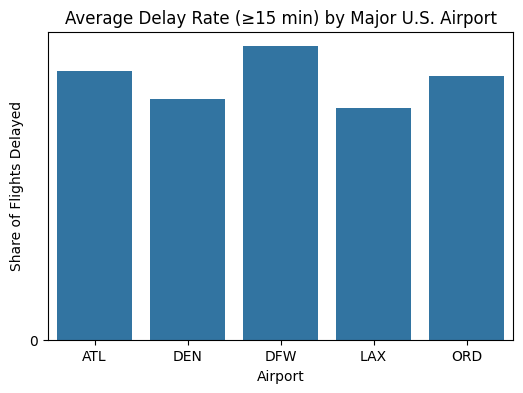

In [ ]:
## neera

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(
    data=flights.groupby("airport_code")["delay_ratio"].mean().reset_index(),
    x="airport_code",
    y="delay_ratio"
)
plt.title("Average Delay Rate (≥15 min) by Major U.S. Airport")
plt.xlabel("Airport")
plt.yticks(range(0,1))
plt.ylabel("Share of Flights Delayed")
plt.show()

**Pie Chart**

<Figure size 700x700 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7e9dcf19d5e0>,
 [Text(-0.6281438832383129, 0.9030145413836328, 'ATL'),
  Text(-1.0772236445092582, -0.22268637073290207, 'DEN'),
  Text(0.10208830289763118, -1.0952524724516635, 'DFW'),
  Text(1.0706096838940475, -0.2525765324654846, 'LAX'),
  Text(0.7323630486351512, 0.8207584084210331, 'ORD')],
 [Text(-0.342623936311807, 0.4925533862092542, '19.3%'),
  Text(-0.5875765333686862, -0.12146529312703748, '17.8%'),
  Text(0.05568452885325337, -0.597410439519089, '28.7%'),
  Text(0.5839689184876622, -0.13776901770844613, '11.0%'),
  Text(0.3994707538009915, 0.44768640459329073, '23.2%')])

Text(0.5, 1.0, 'Share of Total Delay Minutes by Airport')

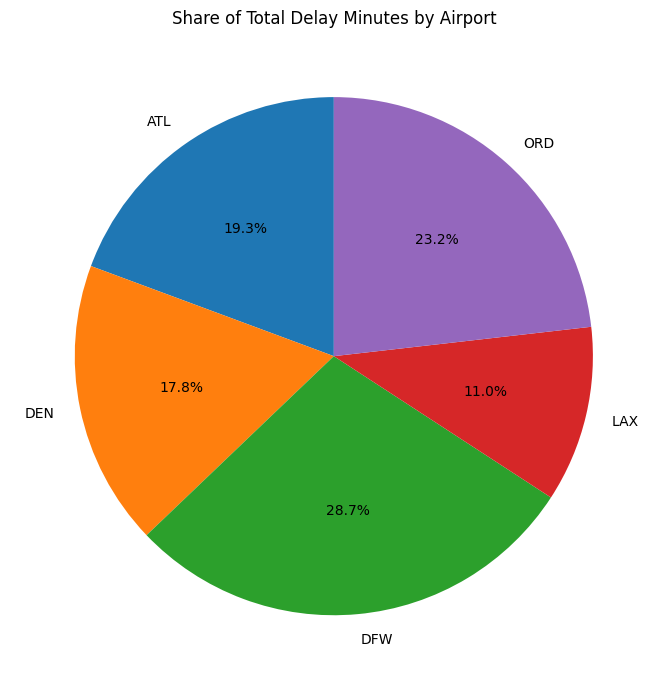

In [ ]:
## neera

## pie chart
airport_delay_totals = flights.groupby("airport_code")["arr_delay"].sum()

plt.figure(figsize=(7,7))
plt.pie(
    airport_delay_totals,
    labels=airport_delay_totals.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Share of Total Delay Minutes by Airport")
plt.tight_layout()
plt.show()

**Preparing final dataset**

This code filters out any rows with zero flights and rebuilds all engineered features needed for prediction, such as delay ratios, cancellation/diversion rates, and the proportional contributions of different delay causes. It then creates a binary label (high_delay) that marks airport-months with significant delay levels, which becomes the target for our machine learning models. Finally, it defines a clean set of feature columns so the dataset is ready for training and analysis.

In [ ]:
## neera

# Keep only rows with valid flight counts
flights_model = flights[flights["arr_flights"] > 0].copy()

# --- Feature engineering (safe to re-run even if you did it before) ---

# % of flights delayed ≥15min
flights_model["delay_ratio"] = flights_model["arr_del15"] / flights_model["arr_flights"]

# Average minutes of delay per total flight
flights_model["avg_delay_min_per_flight"] = (
    flights_model["arr_delay"] / flights_model["arr_flights"]
).fillna(0)

# Cancellation & diversion ratios
flights_model["cancel_ratio"] = flights_model["arr_cancelled"] / flights_model["arr_flights"]
flights_model["divert_ratio"] = flights_model["arr_diverted"] / flights_model["arr_flights"]

# Cause mix as shares of total delay minutes
total_delay_mins = flights_model["arr_delay"].replace(0, np.nan)
for col, new in [
    ("carrier_delay", "share_carrier_delay"),
    ("weather_delay", "share_weather_delay"),
    ("nas_delay", "share_nas_delay"),
    ("security_delay", "share_security_delay"),
    ("late_aircraft_delay", "share_late_aircraft_delay"),
]:
    flights_model[new] = (flights_model[col] / total_delay_mins).fillna(0.0)

# --- Binary label: high-delay vs low-delay airport-month ---
# You can tweak 0.20 if you want.
flights_model["high_delay"] = (flights_model["delay_ratio"] >= 0.20).astype(int)

feature_columns = [
    "year",
    "month",
    "arr_flights",
    "cancel_ratio",
    "divert_ratio",
    "share_carrier_delay",
    "share_weather_delay",
    "share_nas_delay",
    "share_security_delay",
    "share_late_aircraft_delay",
]

flights_model[["airport_code"] + feature_columns + ["high_delay"]].head()

airport_code  year  month  arr_flights  cancel_ratio  divert_ratio  \
0          ATL  2024     12        858.0      0.006993      0.001166   
1          ATL  2024     12        299.0      0.006689      0.003344   
2          ATL  2024     12        599.0      0.008347      0.003339   
3          ATL  2024     12        531.0      0.007533      0.001883   
4          ATL  2024     12       2505.0      0.002395      0.000798   

   share_carrier_delay  share_weather_delay  share_nas_delay  \
0             0.199134             0.014567         0.502516   
1             0.272432             0.072896         0.242162   
2             0.715860             0.180159         0.099376   
3             0.325762             0.043634         0.242279   
4             0.254394             0.032803         0.217649   

   share_security_delay  share_late_aircraft_delay  high_delay  
0              0.010121                   0.273663           1  
1              0.001699                   0.410811           1  
2              0.000000                   0.004605           1  
3              0.000000                   0.388324           0  
4              0.003327                   0.491826           0

In [ ]:
## neera

import pandas as pd
import numpy as np

THRESHOLD = 0.35

flights_model["label"] = (flights_model["delay_ratio"] >= THRESHOLD).astype(int)

# Quick sanity check
print("Label distribution (0 = low delay, 1 = high delay):")
print(flights_model["label"].value_counts(normalize=True))

Label distribution (0 = low delay, 1 = high delay):
label
0    0.894598
1    0.105402
Name: proportion, dtype: float64


**Splitting data across airports**

This code performs a separate train-test split for each airport, ensuring that every airport contributes data to both the training and testing sets. By stratifying on the delay label within each airport, we preserve the balance between high-delay and low-delay cases.

In [ ]:
## neera

from sklearn.model_selection import train_test_split

train_parts = []
test_parts = []

for airport, g in flights_model.groupby("airport_code"):
    X_g = g[feature_columns]
    y_g = g["high_delay"]

    # Split WITHIN this airport
    X_tr, X_te, y_tr, y_te = train_test_split(
        X_g,
        y_g,
        test_size=0.2,
        random_state=11,
        stratify=y_g  # keeps label balance inside each airport
    )

    # Keep airport_code attached for later fairness analysis
    train_g = X_tr.copy()
    train_g["label"] = y_tr
    train_g["airport_code"] = airport

    test_g = X_te.copy()
    test_g["label"] = y_te
    test_g["airport_code"] = airport

    train_parts.append(train_g)
    test_parts.append(test_g)

train_df = pd.concat(train_parts).reset_index(drop=True)
test_df  = pd.concat(test_parts).reset_index(drop=True)

print("Train label distribution:", train_df["label"].value_counts(normalize=True))
print("Test label distribution:", test_df["label"].value_counts(normalize=True))

Train label distribution: label
1    0.530579
0    0.469421
Name: proportion, dtype: float64
Test label distribution: label
1    0.538961
0    0.461039
Name: proportion, dtype: float64


**Training Logisitic Regression and MLP models**

This code initializes and trains both a Logistic Regression and an MLP model using the engineered features from the training dataset. Both models learn patterns that distinguish high-delay airport-months from low-delay ones, following the same structure as your course tutorials. After fitting on the training data, the models are ready to generate predictions.

In [ ]:
## neera

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
)


train_features = train_df[feature_columns]
train_labels   = train_df["label"]

test_features  = test_df[feature_columns]
test_labels    = test_df["label"]

lr_classifier = LogisticRegression(solver='lbfgs', max_iter=10000)
mlp_classifier = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(8, 2),
    random_state=11,
    max_iter=10000
)

# TRAIN MODELS
lr_classifier.fit(train_features.to_numpy(), train_labels.to_numpy())
mlp_classifier.fit(train_features.to_numpy(), train_labels.to_numpy())

print("Models trained successfully...")


LogisticRegression(max_iter=10000)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(8, 2), max_iter=10000,
              random_state=11, solver='lbfgs')

Models trained successfully...


**Evaluating Model Performance on the Test Set**

This code generates predictions from both the Logistic Regression and MLP models and computes key evaluation metrics, including accuracy, precision, recall, and F1-score. These metrics help us understand how well each model identifies high-delay airport-months and reveal differences in performance between the two modeling approaches. By comparing the results between them, we can determine which model is more reliable for predicting flight delays in real-world scenarios.

In [ ]:
## neera

# predict on test set
y_pred_lr  = lr_classifier.predict(test_features.to_numpy())
y_pred_mlp = mlp_classifier.predict(test_features.to_numpy())

# both models
print("Metrics for both models (High Delay = 1)")

# Logistic Regression
lr_acc = accuracy_score(test_labels, y_pred_lr)
lr_prec, lr_rec, lr_f1, _ = precision_recall_fscore_support(
    test_labels, y_pred_lr, average="binary", pos_label=1
)

print("\nLogistic Regression:")
print(f"  Accuracy : {lr_acc:.3f}")
print(f"  Precision: {lr_prec:.3f}")
print(f"  Recall   : {lr_rec:.3f}")
print(f"  F1-score : {lr_f1:.3f}")

# MLP Classifier
mlp_acc = accuracy_score(test_labels, y_pred_mlp)
mlp_prec, mlp_rec, mlp_f1, _ = precision_recall_fscore_support(
    test_labels, y_pred_mlp, average="binary", pos_label=1
)

print("\nMLP Classifier:")
print(f"  Accuracy : {mlp_acc:.3f}")
print(f"  Precision: {mlp_prec:.3f}")
print(f"  Recall   : {mlp_rec:.3f}")
print(f"  F1-score : {mlp_f1:.3f}")


Metrics for both models (High Delay = 1)

Logistic Regression:
  Accuracy : 0.656
  Precision: 0.656
  Recall   : 0.759
  F1-score : 0.704

MLP Classifier:
  Accuracy : 0.539
  Precision: 0.539
  Recall   : 1.000
  F1-score : 0.700


# **Demo of the ML and Logistical Regression model**

In [ ]:
## neera

import numpy as np

example_idx = 15  # plug in for random flight sample

x_row = test_features.iloc[example_idx]
x_np  = x_row.to_numpy().reshape(1, -1)
true_label = test_labels.iloc[example_idx]

print("=== Example airport-month from test set ===")
print("True label (0 = low delay, 1 = high delay):", true_label)
print("\nFeature values:")
display(x_row)

# lr predictions
lr_pred = lr_classifier.predict(x_np)[0]
lr_proba = lr_classifier.predict_proba(x_np)[0]

print("\n[Logistic Regression]")
print(f"Predicted class: {lr_pred}")
print(f"Probability for class 0 (low delay):  {lr_proba[0]:.3f}")
print(f"Probability for class 1 (high delay): {lr_proba[1]:.3f}")

# mlp predictions
mlp_pred = mlp_classifier.predict(x_np)[0]
mlp_proba = mlp_classifier.predict_proba(x_np)[0]

print("\n[MLP Classifier]")
print(f"Predicted class: {mlp_pred}")
print(f"Probability for class 0 (low delay):  {mlp_proba[0]:.3f}")
print(f"Probability for class 1 (high delay): {mlp_proba[1]:.3f}")


=== Example airport-month from test set ===
True label (0 = low delay, 1 = high delay): 0

Feature values:


year                         2024.000000
month                           8.000000
arr_flights                  2596.000000
cancel_ratio                    0.017720
divert_ratio                    0.001156
share_carrier_delay             0.279229
share_weather_delay             0.040866
share_nas_delay                 0.165838
share_security_delay            0.002858
share_late_aircraft_delay       0.511209
Name: 15, dtype: float64


[Logistic Regression]
Predicted class: 1
Probability for class 0 (low delay):  0.448
Probability for class 1 (high delay): 0.552

[MLP Classifier]
Predicted class: 1
Probability for class 0 (low delay):  0.469
Probability for class 1 (high delay): 0.531


**Training the LIME Model**

In [ ]:
## neera

try:
    import lime
except:
    !pip install lime
    import lime

from lime import lime_tabular


In [ ]:
## neera

explainer = lime_tabular.LimeTabularExplainer(
    training_data=train_features.to_numpy(),
    feature_names=train_features.columns,
    class_names=[0, 1],         # 0 = low delay, 1 = high delay
    mode='classification'
)

**DEMO of LIME model**

This code uses LIME to explain why the Logistic Regression model made a specific prediction for one airport-month in the test set. It displays the true label and feature values, then generates a LIME visualization showing which factors increased or decreased the model’s predicted delay risk. This interpretability step helps build trust and provides insight into how the model uses operational and weather-related patterns to flag potential delays.

In [ ]:
## neera

import numpy as np

example_idx = 16   # plug in for random flight sample

example_row = test_features.iloc[example_idx]
example_label = test_labels.iloc[example_idx]

print("True label for this example (0 = low delay, 1 = high delay):", example_label)
print("\nFeature values:")
display(example_row)

input_data = example_row.to_numpy()

exp = explainer.explain_instance(
    data_row=input_data,
    predict_fn=lr_classifier.predict_proba
)

exp.show_in_notebook(show_table=True)

pred_class = lr_classifier.predict(example_row.to_numpy().reshape(1, -1))[0]
pred_proba = lr_classifier.predict_proba(example_row.to_numpy().reshape(1, -1))[0][pred_class]

print(f"Model prediction for this example: {pred_class} "
      f"(probability = {pred_proba:.3f})")


True label for this example (0 = low delay, 1 = high delay): 1

Feature values:


year                         2024.000000
month                           9.000000
arr_flights                   739.000000
cancel_ratio                    0.047361
divert_ratio                    0.001353
share_carrier_delay             0.254166
share_weather_delay             0.066460
share_nas_delay                 0.433989
share_security_delay            0.007584
share_late_aircraft_delay       0.237801
Name: 16, dtype: float64

Model prediction for this example: 1 (probability = 0.558)


**Evaluating Model Bias/Fairness**

This code measures how well each model performs for every airport by calculating accuracy, precision, recall, and F1-score separately for ATL, DEN, DFW, LAX, and ORD. By comparing performance across these groups, we can identify whether the models are more accurate for some airports than others, which is an important fairness consideration in real-world deployment.

In [ ]:
## neera

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

fairness_results_lr = []
fairness_results_mlp = []

for airport in ["ATL", "DEN", "DFW", "LAX", "ORD"]:
    subset = test_df[test_df["airport_code"] == airport]

    X_air = subset[feature_columns]
    y_air = subset["label"]

    # logistical regression
    lr_pred = lr_classifier.predict(X_air)
    lr_acc  = accuracy_score(y_air, lr_pred)
    lr_prec, lr_rec, lr_f1, _ = precision_recall_fscore_support(
        y_air, lr_pred, average="binary", pos_label=1
    )
    fairness_results_lr.append([airport, lr_acc, lr_prec, lr_rec, lr_f1])

    # mlp
    mlp_pred = mlp_classifier.predict(X_air)
    mlp_acc  = accuracy_score(y_air, mlp_pred)
    mlp_prec, mlp_rec, mlp_f1, _ = precision_recall_fscore_support(
        y_air, mlp_pred, average="binary", pos_label=1
    )
    fairness_results_mlp.append([airport, mlp_acc, mlp_prec, mlp_rec, mlp_f1])


fairness_lr_df = pd.DataFrame(
    fairness_results_lr,
    columns=["Airport", "Accuracy", "Precision", "Recall", "F1"]
)

fairness_mlp_df = pd.DataFrame(
    fairness_results_mlp,
    columns=["Airport", "Accuracy", "Precision", "Recall", "F1"]
)

fairness_lr_df, fairness_mlp_df


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature name

(  Airport  Accuracy  Precision    Recall        F1
 0     ATL  0.676471   0.666667  0.842105  0.744186
 1     DEN  0.692308   0.692308  0.692308  0.692308
 2     DFW  0.724138   0.875000  0.700000  0.777778
 3     LAX  0.689655   0.611111  0.846154  0.709677
 4     ORD  0.527778   0.520000  0.722222  0.604651,
   Airport  Accuracy  Precision  Recall        F1
 0     ATL  0.558824   0.558824     1.0  0.716981
 1     DEN  0.500000   0.500000     1.0  0.666667
 2     DFW  0.689655   0.689655     1.0  0.816327
 3     LAX  0.448276   0.448276     1.0  0.619048
 4     ORD  0.500000   0.500000     1.0  0.666667)

The model shows noticeable fairness differences across airports, with DFW performing the best and ORD/LAX performing the worst. Logistic Regression is more balanced, while the MLP consistently predicts high delays, resulting in perfect recall but uneven precision and accuracy across locations. These gaps (about 0.18–0.20 in F1-score) indicate that the model generalizes better to some airports than others. This bias likely comes from differences in delay patterns, suggesting the need for airport-specific features or additional context to improve fairness.

**Visualizations**

<Axes: xlabel='airport_code'>

Text(0.5, 1.0, 'Average Delay Cause Breakdown by Airport')

Text(0.5, 0, 'Airport')

Text(0, 0.5, 'Proportion of Delay Minutes')

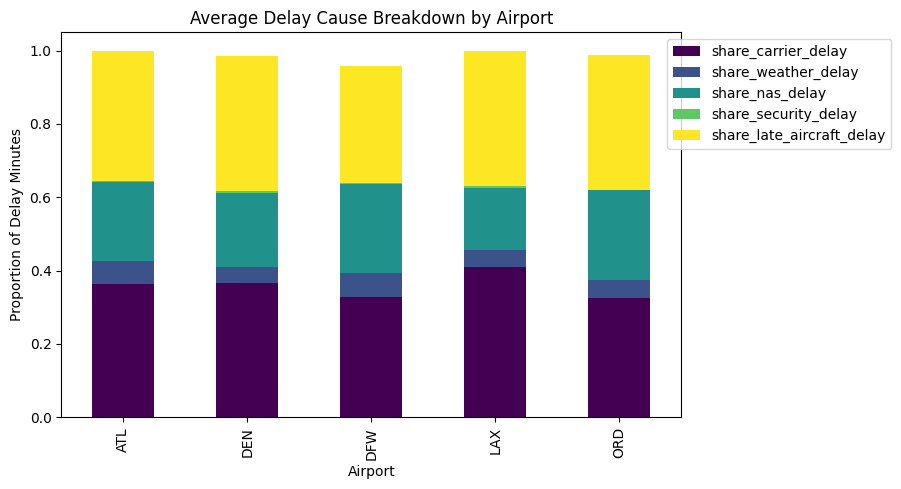

In [ ]:
## neera

# stacked bar chart

cause_cols = [
    "share_carrier_delay",
    "share_weather_delay",
    "share_nas_delay",
    "share_security_delay",
    "share_late_aircraft_delay"
]

airport_causes = flights_model.groupby("airport_code")[cause_cols].mean()

airport_causes.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    colormap="viridis"
)

plt.title("Average Delay Cause Breakdown by Airport")
plt.xlabel("Airport")
plt.ylabel("Proportion of Delay Minutes")
plt.legend(loc="upper right", bbox_to_anchor=(1.35, 1))
plt.show()


<Figure size 700x400 with 0 Axes>

<Axes: xlabel='month', ylabel='delay_ratio'>

Text(0.5, 1.0, 'Seasonal Trend: Average Delay Ratio by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Delay Ratio')

([<matplotlib.axis.XTick at 0x7e9dcd6285f0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

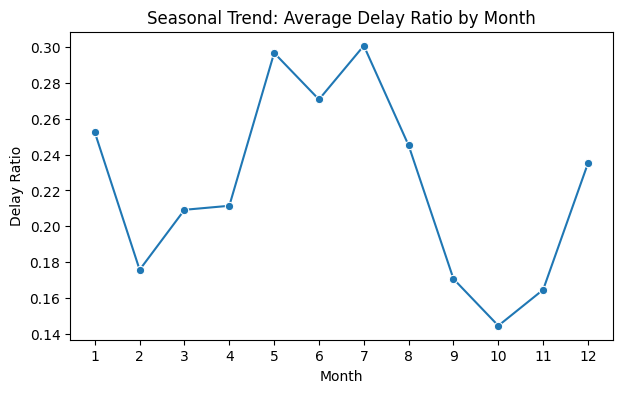

In [ ]:
## neera

# line graph

monthly_delay = flights_model.groupby("month")["delay_ratio"].mean().reset_index()

plt.figure(figsize=(7,4))
sns.lineplot(data=monthly_delay, x="month", y="delay_ratio", marker="o")
plt.title("Seasonal Trend: Average Delay Ratio by Month")
plt.xlabel("Month")
plt.ylabel("Delay Ratio")
plt.xticks(range(1,13))
plt.show()


It is clear that flights in the summer months (May, June, July) have a higher chance of being delayed.

<Figure size 800x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Feature Importance from Logistic Regression')

Text(0.5, 0, 'Coefficient Value')

Text(0, 0.5, 'Feature')

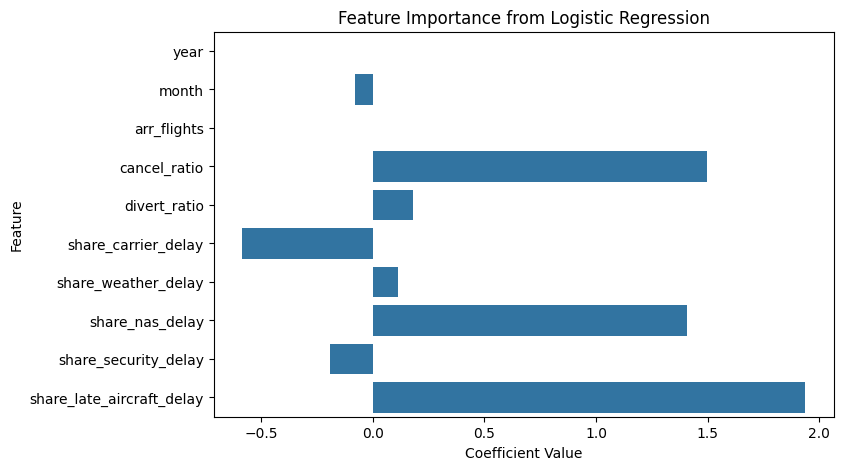

In [ ]:
## neera

## feature importance

coefficient = lr_classifier.coef_[0]

plt.figure(figsize=(8,5))
sns.barplot(x=coefficient, y=feature_columns)
plt.title("Feature Importance from Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


Based on the data, our model that we built will significantly reduce

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<Axes: xlabel='airport_code'>

Text(0.5, 1.0, 'Impact: Actual vs Predicted High-Delay Risk by Airport')

Text(0.5, 0, 'Airport')

Text(0, 0.5, 'Rate')

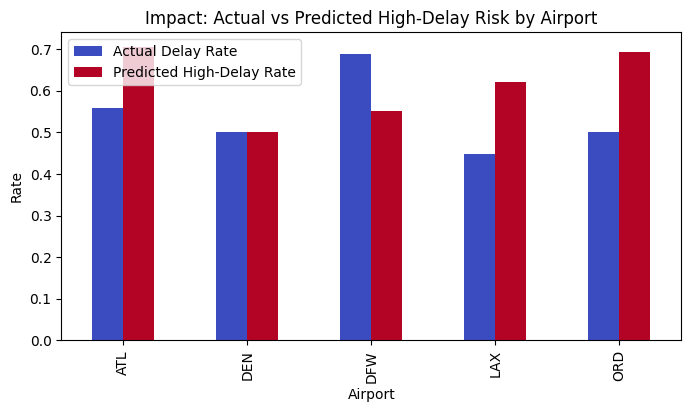

In [ ]:
## neera

predicted = test_df.copy()
predicted["lr_pred"] = lr_classifier.predict(test_features)

comparison = predicted.groupby("airport_code")[["label","lr_pred"]].mean().reset_index()
comparison.rename(columns={"label": "Actual Delay Rate", "lr_pred": "Predicted High-Delay Rate"}, inplace=True)

comparison.plot(
    x="airport_code",
    kind="bar",
    figsize=(8,4),
    colormap="coolwarm"
)
plt.title("Impact: Actual vs Predicted High-Delay Risk by Airport")
plt.xlabel("Airport")
plt.ylabel("Rate")
plt.show()


This chart compares each airport’s actual high-delay rate to what our model predicted. In some cases, like DEN, the prediction is very close to reality, while at airports like ATL, LAX, and ORD, the model predicts more high-delay months than actually occurred. This shows that the model captures overall trends but can be overly cautious at some airports.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


<Figure size 700x600 with 0 Axes>

Text(0.5, 1.0, 'ROC Curves for Logistic Regression and MLP')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

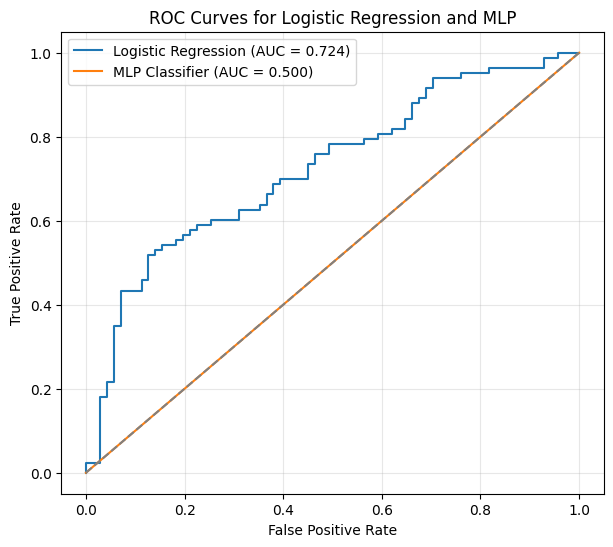

In [ ]:
# neera

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# predicted probabilities for class 1 (high delay)
lr_probs  = lr_classifier.predict_proba(test_features)[:, 1]
mlp_probs = mlp_classifier.predict_proba(test_features)[:, 1]

# compute ROC curve + AUC (area under the curve) for LR
lr_fpr, lr_tpr, _ = roc_curve(test_labels, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

# compute ROC curve + AUC for MLP
mlp_fpr, mlp_tpr, _ = roc_curve(test_labels, mlp_probs)
mlp_auc = auc(mlp_fpr, mlp_tpr)

# plot the ROC curves
plt.figure(figsize=(7,6))
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.3f})")
plt.plot(mlp_fpr, mlp_tpr, label=f"MLP Classifier (AUC = {mlp_auc:.3f})")

# reference line for random guessing
plt.plot([0,1], [0,1], linestyle="--", color="gray")

plt.title("ROC Curves for Logistic Regression and MLP")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


It is clear that the Logistic Regression model performs better than the MLP model. The LR model has an AUC of 0.724 vs. the 0.5 of the MLP (the same as a random guess). Overall, this confirms that Logistic Regression is the stronger and more reliable model for predicting flight delays in your dataset.

## Simple Demo UI: Choose an Airport and Month

The cells below provide a simple UI for our models.  
Instead of manually editing indices, we can now:

*   Pick an airport code, year, and month
*   See the predicted delay risk and the true label
*   Optionally see a LIME explanation for that airport-month

This makes the model easier to try out for different scenarios.


In [ ]:
# sohan

# simple helper function to run a prediction for a given airport + year + month
def show_delay_prediction(airport_code, year, month):
    # filter the test set for the airport month
    subset = test_df[
        (test_df["airport_code"] == airport_code) &
        (test_df["year"] == year) &
        (test_df["month"] == month)
    ]

    if subset.empty:
        print(f"No test data found for {airport_code} in {year}-{month}.")
        return

    # just take the first matching row
    row = subset.iloc[0]
    X_row = row[feature_columns].to_numpy().reshape(1, -1)
    true_label = row["label"]


    # logistic Regression prediction
    pred_class = lr_classifier.predict(X_row)[0]
    proba = lr_classifier.predict_proba(X_row)[0][pred_class]


    print("=== Delay Prediction for Airport-Month ===")
    print(f"Airport: {airport_code}")
    print(f"Year: {year}, Month: {month}")
    print(f"True label (0 = low delay, 1 = high delay): {true_label}")
    print(f"Predicted class: {pred_class}")
    print(f"Model confidence for this class: {proba:.3f}")


# change these arguments to try different airport-months
show_delay_prediction("DFW", 2024, 7)


=== Delay Prediction for Airport-Month ===
Airport: DFW
Year: 2024, Month: 7
True label (0 = low delay, 1 = high delay): 1
Predicted class: 0
Model confidence for this class: 0.548


In [ ]:
# sohan

# helper to show LIME explanation for a chosen airport, year and month

def explain_delay_with_lime(airport_code, year, month):
    subset = test_df[
        (test_df["airport_code"] == airport_code) &
        (test_df["year"] == year) &
        (test_df["month"] == month)
    ]

    if subset.empty:
        print(f"No test data found for {airport_code} in {year}-{month}.")
        return

    row = subset.iloc[0]
    X_row = row[feature_columns]
    true_label = row["label"]

    print("=== LIME Explanation for Airport-Month ===")
    print(f"Airport: {airport_code}")
    print(f"Year: {year}, Month: {month}")
    print(f"True label (0 = low delay, 1 = high delay): {true_label}")
    print("\nFeature values:")
    display(X_row)




    exp = explainer.explain_instance(
        data_row=X_row.to_numpy(),
        predict_fn=lr_classifier.predict_proba
    )

    exp.show_in_notebook(show_table=True)


#same airport-month as above, or change as needed
explain_delay_with_lime("DFW", 2024, 7)


=== LIME Explanation for Airport-Month ===
Airport: DFW
Year: 2024, Month: 7
True label (0 = low delay, 1 = high delay): 1

Feature values:


year                             2024
month                               7
arr_flights                    1061.0
cancel_ratio                 0.067861
divert_ratio                  0.00377
share_carrier_delay          0.576449
share_weather_delay          0.028599
share_nas_delay              0.166625
share_security_delay              0.0
share_late_aircraft_delay    0.228327
Name: 65, dtype: object